In [3]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

## load data

In [6]:
df = pd.read_csv("data/trajectories.csv")
df

,traj_numb,lon,lat
0,543,-59.1725,56.7500
1,543,-59.0950,56.5000
2,543,-59.2500,56.3400
3,543,-59.3125,56.2500
4,543,-59.4425,56.0000
...,...,...,...
234705,33589,-64.5000,43.8550
234706,33589,-64.5800,43.7500
234707,33589,-64.7500,43.6225
234708,33589,-64.9000,43.5000


#### Trajectories between two transects. Generated by TRACMASS- a lagrangian particle tracking code using geostrophic velocities

/var/folders/qk/1gnhnhxn2m91qb1gz4tvnd240000gn/T/ipykernel_13622/181675822.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for traj in df.groupby(['traj_numb']):


Text(-67, 42, 'T2')

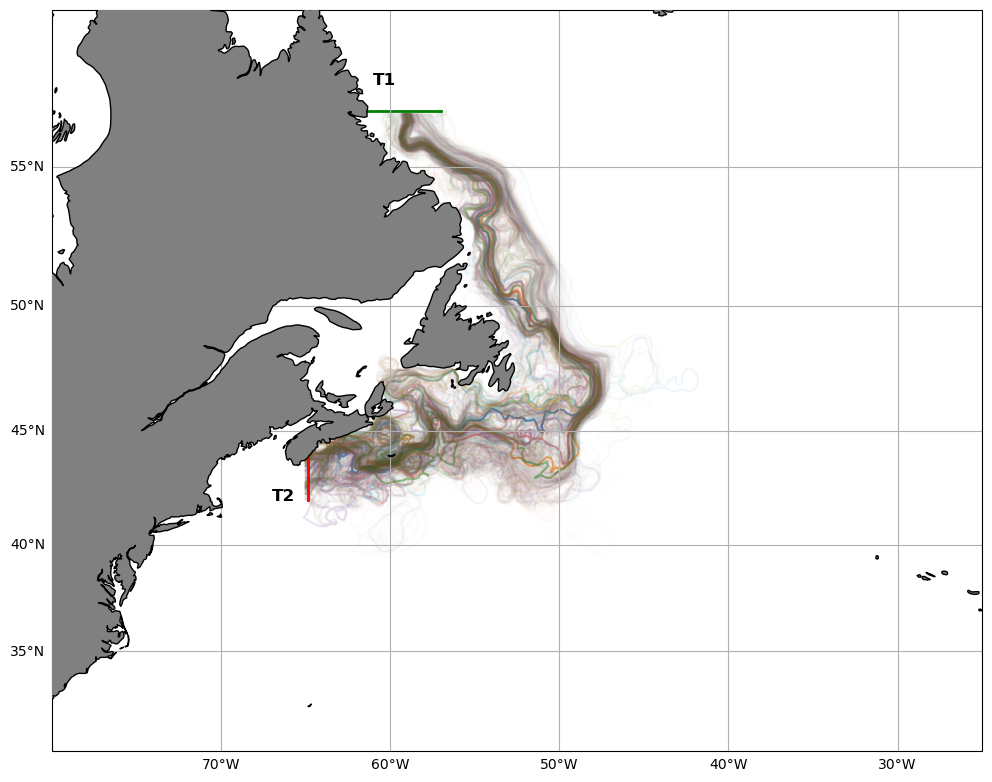

In [38]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0], projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND, facecolor="gray", zorder=15, edgecolor="k")

lon_lim = [-80, -25]
lat_lim = [30, 60]

transect1=[np.arange(-62, -56),np.repeat(56.875,6)]
transect2=[np.repeat(-64.875,3),np.arange(42, 45)]

ax.set_extent([lon_lim[0], lon_lim[1], lat_lim[0], lat_lim[1]], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.top_labels = False;gl.right_labels = False
count=1
for traj in df.groupby(['traj_numb']):
    
    ax.plot(
        traj[1].lon,
        traj[1].lat,
        # "blue",
        # linewidth=2,
        transform=ccrs.PlateCarree(),
        alpha=1 / (count * 0.3 + 1),
       
    )
    count = count + 1

ax.plot(transect1[0],transect1[1],color='green',transform=ccrs.PlateCarree(),linewidth=2)
ax.plot(transect2[0],transect2[1],color='red',transform=ccrs.PlateCarree(),linewidth=2)

ax.text( -61,57.7,"T1",color="k",fontsize=12,weight="bold",transform=ccrs.PlateCarree())
ax.text(-67,42,"T2",color="k",fontsize=12,weight="bold",transform=ccrs.PlateCarree())


